# Testing speckle contrast estimators

Import basic routines

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import sys

Import speckle related routines

In [6]:
sys.path.insert(0, '../scripts/')
from speckle_routines import *
from contrast_estimators import *

parameters for the speckle pattern

In [7]:
nx,ny = 2*704,2*768 # size of array x,y
kbar = 0.003      # mean photon density (photons per pixel)
modes = 10       # number of modes in the speckle pattern
specklesize = 1 # speckle size in pixel units
nshots = 100

Calculate the average histogram by looping over the number of shots

In [8]:
bi,bf,db = 0.0,6.,1.
photon_histogram = np.zeros(bf-1.,dtype=float)

for i in range(nshots):
    speckle = simulate_speckles_with_shot_noise([nx,ny],modes,specklesize,kbar)
    hy,hx = np.histogram(speckle,bins = np.arange(bi,bf,db)) 
    photon_histogram += hy
    print i,hy

photon_histogram /= np.float32(nshots*nx*ny)
print photon_histogram

/Users/fivos/pyvos/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


0 [2156209    6470       9       0       0]
1 [2156207    6474       7       0       0]
2 [2156209    6470       9       0       0]
3 [2156207    6474       7       0       0]
4 [2156209    6470       9       0       0]
5 [2156211    6466      11       0       0]
6 [2156215    6458      15       0       0]
7 [2156209    6470       9       0       0]
8 [2156213    6462      13       0       0]
9 [2156211    6466      11       0       0]
10 [2156210    6468      10       0       0]
11 [2156210    6468      10       0       0]
12 [2156211    6466      11       0       0]
13 [2156211    6466      11       0       0]
14 [2156210    6468      10       0       0]
15 [2156206    6476       6       0       0]
16 [2156216    6456      16       0       0]
17 [2156208    6472       8       0       0]
18 [2156214    6460      14       0       0]
19 [2156213    6462      13       0       0]
20 [2156209    6470       9       0       0]
21 [2156212    6464      12       0       0]
22 [2156207    6474 

Calculate the contrast from the photon histogram

In [9]:
# maximum likelihood estimator
contrast, err = fit_negative_binomial_from_hist(photon_histogram, method='ml', limit=1e-4)
print 'ml:',contrast,err

# analytical estimator
contrast2 = analytical_estimator(kbar,photon_histogram[1],photon_histogram[2])
print 'ae:',contrast2

# pmf's
x = np.arange(-0.5,4.,0.1)
y_in = negative_binomial_pmf(x,kbar,1./modes)
y_ml = negative_binomial_pmf(x,kbar,contrast)
y_ae = negative_binomial_pmf(x,kbar,contrast2)

ml: 0.121327057052 10.7649220388
ae: 0.125249572236


Plot the resulting histogram and fits

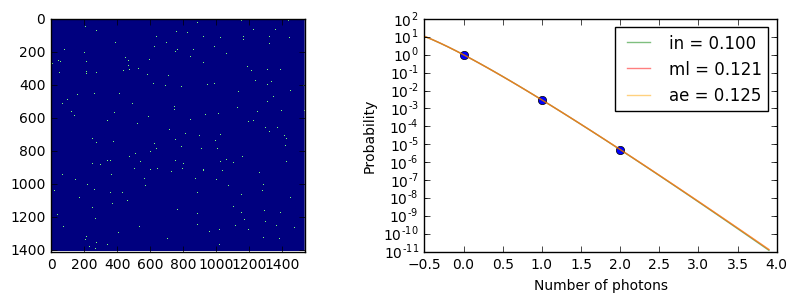

In [10]:
plt.figure(figsize = [10,3])

plt.subplot(1,2,1)
plt.imshow(speckle,interpolation='none')

plt.subplot(1,2,2)
plt.plot(hx[:-1],photon_histogram,'bo')
#plt.bar(hx[:-1]-db/2.,hy,width = db)
plt.plot(x,y_in,c='green',lw=1,label='in = %.3f'%(1./modes),alpha=0.5)
plt.plot(x,y_ml,c='red',lw=1,label='ml = %.3f'%(contrast),alpha=0.5)
plt.plot(x,y_ae,c='orange',lw=1,label='ae = %.3f'%(contrast2),alpha=0.5)
plt.yscale('log',nonposy='clip')
plt.xlabel('Number of photons')
plt.ylabel('Probability')
plt.legend()
plt.show()